In [2]:
#Basic libraries
import pandas as pd
import numpy as np

#model algorithms
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier #this is not scikit's xgboost

#for plotting data
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
import seaborn as sns

#validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score

#pre-processing
from sklearn.preprocessing import Imputer

#add pipeline here
from sklearn.pipeline import make_pipeline


/home/lazyowl/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#general function to get_data
def get_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test

In [4]:
train_data, submission_data = get_data()
#to know about NaN values
print(train_data.isnull().sum())
print(submission_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
#used for analyzing the data
pd.read_csv('train.csv')
#print(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
y = train_data.Survived
cols_to_use = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Age', 'Embarked']
X = train_data[cols_to_use]
test_data = submission_data[cols_to_use]

In [11]:
#using embarkment
embarked = {"Embarked": {"S": 1, "Q": 2, "C": 3}}
X.replace(embarked, inplace=True)
test_data.replace(embarked, inplace=True)

/home/lazyowl/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [12]:
print(X)

     Pclass  SibSp  Parch      Fare     Sex   Age  Embarked
0         3      1      0    7.2500    male  22.0       1.0
1         1      1      0   71.2833  female  38.0       3.0
2         3      0      0    7.9250  female  26.0       1.0
3         1      1      0   53.1000  female  35.0       1.0
4         3      0      0    8.0500    male  35.0       1.0
5         3      0      0    8.4583    male   NaN       2.0
6         1      0      0   51.8625    male  54.0       1.0
7         3      3      1   21.0750    male   2.0       1.0
8         3      0      2   11.1333  female  27.0       1.0
9         2      1      0   30.0708  female  14.0       3.0
10        3      1      1   16.7000  female   4.0       1.0
11        1      0      0   26.5500  female  58.0       1.0
12        3      0      0    8.0500    male  20.0       1.0
13        3      1      5   31.2750    male  39.0       1.0
14        3      0      0    7.8542  female  14.0       1.0
15        2      0      0   16.0000  fem

In [13]:
#one-hot-encoding of sex
sex_encoded_train = pd.get_dummies(X['Sex'], prefix='Sex')
sex_encoded_test = pd.get_dummies(test_data['Sex'], prefix='Sex')

X.drop(['Sex'], axis=1, inplace=True)
test_data.drop(['Sex'], axis=1, inplace=True)

X = X.join(sex_encoded_train)
test_data = test_data.join(sex_encoded_test)

/home/lazyowl/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/lazyowl/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
# train-test split
train_X, val_X, train_y, val_y = train_test_split(X,
                                                  y,random_state = 0)
#handling age and fare NaN values
my_imputer = Imputer()
print(test_data.isnull().sum())
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)
imputed_test_data = my_imputer.transform(test_data)
X = my_imputer.transform(X)

print(type(train_X))
print(type(imputed_test_data))
print(X[0])

Pclass         0
SibSp          0
Parch          0
Fare           1
Age           86
Embarked       0
Sex_female     0
Sex_male       0
dtype: int64
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[  3.     1.     0.     7.25  22.     1.     0.     1.  ]


In [122]:
def change_age(age_array):
    ages = age_array
    for x in range(0, len(ages)):
        #print(ages[x])
        if ages[x] < 18:
            ages[x] = 1
        elif ages[x] < 60:
            ages[x] = 2
        else:
            ages[x] = 3
    return ages

X[:, 4] = change_age(X[:, 4])
train_X[:, 4] = change_age(train_X[:, 4])
val_X[:, 4] = change_age(val_X[:, 4])
imputed_test_data[:, 4] = change_age(imputed_test_data[:, 4])

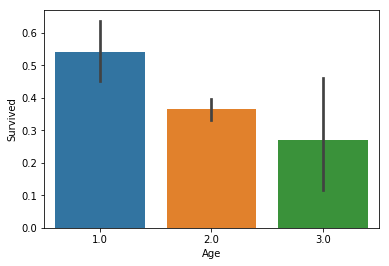

In [123]:
age_category_data = pd.DataFrame({'Age': X[:, 4], 'Sex': train_data.Sex, 'Survived': y})
sns.barplot(x="Age",y="Survived", data=age_category_data);
plt.show()

In [124]:
#categorizing fare
def change_fare(fare_array):
    fares = fare_array
    for x in range(0, len(fares)):
        #print(ages[x])
        if fares[x] < 11:
            fares[x] = 1
        elif fares[x] < 40:
            fares[x] = 2
        else:
            fares[x] = 3
    return fares

X[:, 3] = change_fare(X[:, 3])
train_X[:, 3] = change_fare(train_X[:, 3])
val_X[:, 3] = change_fare(val_X[:, 3])
imputed_test_data[:, 3] = change_fare(imputed_test_data[:, 3])

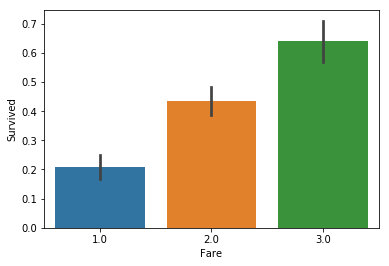

In [128]:
fare_category_data = pd.DataFrame({'Fare': X[:, 3], 'Sex': train_data.Sex, 'Survived': y})
sns.barplot(x="Fare",y="Survived", data=fare_category_data);
plt.show()

In [15]:
#adding n_estimators and early_stopping_rounds
my_model = XGBClassifier(n_estimators=1000, learning_rate=0.005)
my_model.fit(train_X, train_y, early_stopping_rounds=50, 
             eval_set=[(val_X, val_y)])

[0]	validation_0-error:0.179372
Will train until validation_0-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.179372
[2]	validation_0-error:0.179372
[3]	validation_0-error:0.179372
[4]	validation_0-error:0.179372
[5]	validation_0-error:0.179372
[6]	validation_0-error:0.179372
[7]	validation_0-error:0.179372
[8]	validation_0-error:0.179372
[9]	validation_0-error:0.179372
[10]	validation_0-error:0.179372
[11]	validation_0-error:0.179372
[12]	validation_0-error:0.179372
[13]	validation_0-error:0.179372
[14]	validation_0-error:0.179372
[15]	validation_0-error:0.179372
[16]	validation_0-error:0.179372
[17]	validation_0-error:0.179372
[18]	validation_0-error:0.179372
[19]	validation_0-error:0.179372
[20]	validation_0-error:0.179372
[21]	validation_0-error:0.179372
[22]	validation_0-error:0.179372
[23]	validation_0-error:0.179372
[24]	validation_0-error:0.179372
[25]	validation_0-error:0.179372
[26]	validation_0-error:0.179372
[27]	validation_0-error:0.179372
[28]	validation_0-er

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.005, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [16]:
train_preds = my_model.predict(val_X)
print(accuracy_score(train_preds, val_y))

0.820627802691


In [17]:
xg_model = XGBClassifier(n_estimators=40, learning_rate=0.005)
xg_model.fit(X, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.005, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=40, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [18]:
print(X.shape)
print(imputed_test_data.shape)

(891, 8)
(418, 8)


In [19]:
submission_predicted = xg_model.predict(imputed_test_data)
print(submission_predicted.shape)

(418,)


# Submission

In [20]:
my_submission = pd.DataFrame({'PassengerId': submission_data.PassengerId, 'Survived': submission_predicted})
my_submission.to_csv('submission_XGBoost.csv', index=False)
pd.read_csv('submission_XGBoost.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
